<a href="https://colab.research.google.com/github/SandhyaKshirsagar/EDA_practice/blob/main/Flights_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing all the important libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# path variables
airlines_path = '/content/drive/MyDrive/Colab Notebooks/EDA Case Study/airlines.csv'
airport_path = '/content/drive/MyDrive/Colab Notebooks/EDA Case Study/airports.csv'
flights_path = '/content/drive/MyDrive/Colab Notebooks/EDA Case Study/flights.csv'

In [ ]:
# reading the csv files
airlines_data = pd.read_csv(airlines_path)
airport_data = pd.read_csv(airport_path)
flights_data = pd.read_csv(flights_path)

<ipython-input-22-00333344b13e>:4: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights_data = pd.read_csv(flights_path)


In [ ]:
flights_data.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
airport_data.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [ ]:
airlines_data.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [ ]:
# Get all the unique countries in airport_data

airport_data['COUNTRY'].unique()

array(['USA'], dtype=object)

In [ ]:
# check for all the null values present inside airport_data
airport_data.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [ ]:
# delete the null values from airport_data
airport_data = airport_data.dropna()

In [ ]:
airport_data.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     0
LONGITUDE    0
dtype: int64

In [ ]:
#plotting the latitude and longitude on a map
# lat and long pairs
lat_long_pairs = []
airport_code = []

for i in range(airport_data.shape[0]): # dynamically passing the rows. shape[0] gets only the rows from the shape tuple
  lat_i = airport_data['LATITUDE'].iloc[i] #getting lat of each row
  long_i = airport_data['LONGITUDE'].iloc[i] #getting long of each row
  lat_long_pairs.append((lat_i, long_i)) # appending lat and log as a tuple to the list lat_long_pairs

  iata_i = airport_data['IATA_CODE'].iloc[i] # get each IATA_code form the file
  airport_code.append(iata_i) # append it to the airport_code list

In [ ]:
# folium library is required to use maps
! pip install folium

In [ ]:
import folium
from folium.features import DivIcon

In [ ]:
# define a default location to show on the google map when loaded initially
usa_lat = 40.730610
usa_long = -73.935242

#initializing folium
#usa_map = folium.Map((usa_lat, usa_long), width = 1000, height = 500)
usa_map = folium.Map((usa_lat, usa_long))

In [ ]:
usa_map

In [ ]:
# mapping the airports on the map

#defineing the sytle using HTMl/CSS
html = '<div style = "color:red; font_size: 8pt;">airport_code</div>'

for loc, air_code in zip(lat_long_pairs, airport_code):
  folium.Marker(loc, icon = DivIcon(
      icon_size = (30,30),
      icon_anchor = (0,0),
      html = html.replace('airport_code', air_code))).add_to(usa_map)

In [ ]:
usa_map

In [ ]:
for loc, air_code in zip(lat_long_pairs, airport_code):
  folium.Marker(loc).add_to(usa_map)

In [ ]:
usa_map

In [ ]:
flights_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#flights_dataset
# find the percentage of value missing on each column of flights data
def get_null_data(data):
  total_rows = data.shape[0]
  for columns in data.columns:
    null_values = data[columns].isnull().sum()
    if null_values > 0:
      percent_null_value = float(null_values)*100/total_rows
      print(f"{columns} column has {percent_null_value}% null values")

In [ ]:
get_null_data(flights_data)

TAIL_NUMBER column has 0.25297817747447665% null values
DEPARTURE_TIME column has 1.4805263857046793% null values
DEPARTURE_DELAY column has 1.4805263857046793% null values
TAXI_OUT column has 1.5302593417274453% null values
WHEELS_OFF column has 1.5302593417274453% null values
SCHEDULED_TIME column has 0.00010310910025452482% null values
ELAPSED_TIME column has 1.8056293788071962% null values
AIR_TIME column has 1.8056293788071962% null values
WHEELS_ON column has 1.5898220319744756% null values
TAXI_IN column has 1.5898220319744756% null values
ARRIVAL_TIME column has 1.5898220319744756% null values
ARRIVAL_DELAY column has 1.8056293788071962% null values
CANCELLATION_REASON column has 98.45535693878705% null values
AIR_SYSTEM_DELAY column has 81.72496025573807% null values
SECURITY_DELAY column has 81.72496025573807% null values
AIRLINE_DELAY column has 81.72496025573807% null values
LATE_AIRCRAFT_DELAY column has 81.72496025573807% null values
WEATHER_DELAY column has 81.7249602557

In [ ]:
# Whenever the missing values is more than 80%, drop the cols

cols_to_drop = ['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
flights_data.drop(cols_to_drop, axis=1, inplace=True)

In [ ]:
get_null_data(flights_data)

TAIL_NUMBER column has 0.25297817747447665% null values
DEPARTURE_TIME column has 1.4805263857046793% null values
DEPARTURE_DELAY column has 1.4805263857046793% null values
TAXI_OUT column has 1.5302593417274453% null values
WHEELS_OFF column has 1.5302593417274453% null values
SCHEDULED_TIME column has 0.00010310910025452482% null values
ELAPSED_TIME column has 1.8056293788071962% null values
AIR_TIME column has 1.8056293788071962% null values
WHEELS_ON column has 1.5898220319744756% null values
TAXI_IN column has 1.5898220319744756% null values
ARRIVAL_TIME column has 1.5898220319744756% null values
ARRIVAL_DELAY column has 1.8056293788071962% null values


In [ ]:
# check to see percentage info for loss of data if we should delete the null values from the above cols also
rows_after_dropping_null = flights_data.dropna(axis=0).shape[0]
rows_before_droppping_null = flights_data.shape[0]

per_info_loss = (rows_before_droppping_null - rows_after_dropping_null)*100/rows_before_droppping_null
print(f'Percentage information loss after dropping null values is {round(per_info_loss,2)}%')

Percentage information loss after dropping null values is 1.81%


In [ ]:
# As the percentage loss is 1.81%, its a very low loss so the null values can be deleted
# dropping null values form all columns

flights_data.dropna(axis=0, inplace=True)

In [ ]:
get_null_data(flights_data)

<ipython-input-23-67af5a9347e5>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


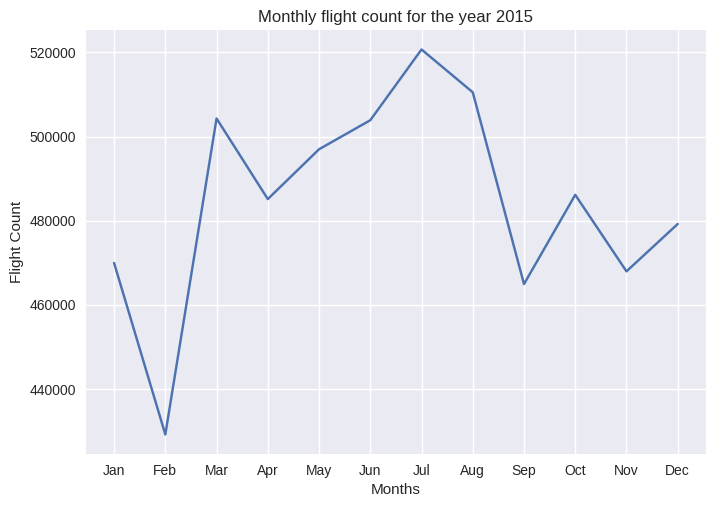

In [ ]:
# plot the monthly flight count data
plt.style.use('seaborn')
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] # month names
flights_data.groupby('MONTH').count()['FLIGHT_NUMBER'].plot()
plt.xlabel("Months") # label for x axis
plt.xticks(labels = labels, ticks = np.arange(1,13)) # assign each month name to each tick on x axis
plt.ylabel("Flight Count") # label for y axis
plt.title('Monthly flight count for the year 2015') # title of the graph
plt.show()

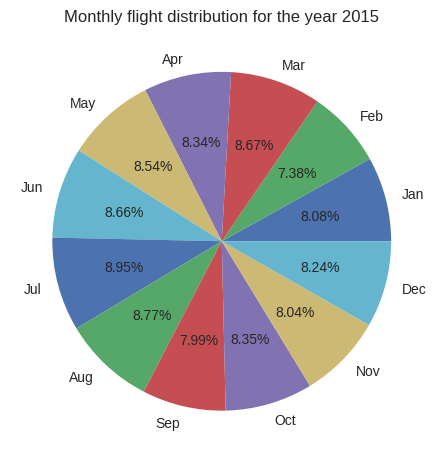

In [ ]:
#Drawing pie chart for the same data

plt.pie(x=flights_data.groupby('MONTH').count()['FLIGHT_NUMBER'], labels=labels, autopct='%0.2f%%')
plt.title('Monthly flight distribution for the year 2015')
plt.show()

<ipython-input-26-b6bb173fb22a>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


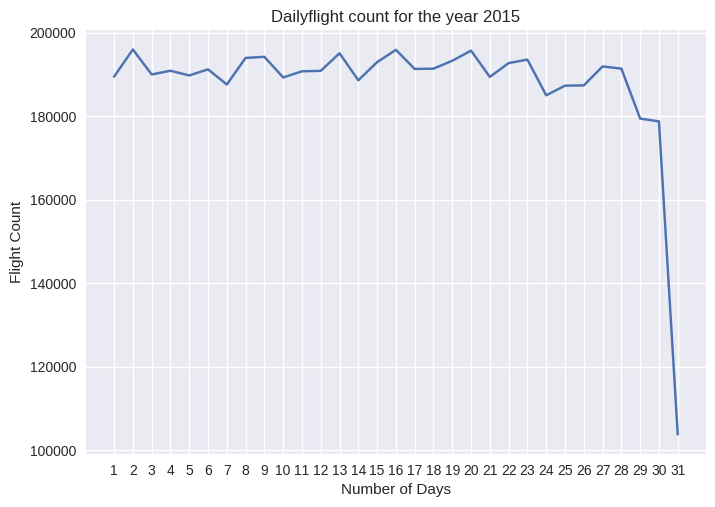

In [ ]:
plt.style.use('seaborn')
flights_data.groupby('DAY').count()['AIRLINE'].plot()
plt.xlabel("Number of Days") # label for x axis
plt.xticks(ticks = np.arange(1,32)) # assign each month name to each tick on x axis
plt.ylabel("Flight Count") # label for y axis
plt.title('Dailyflight count for the year 2015') # title of the graph
plt.show()

In [ ]:
flights_data.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


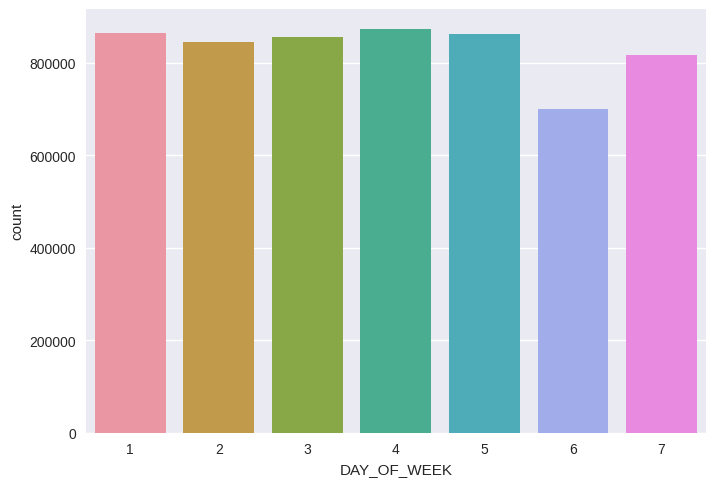

In [ ]:
# same data based on weeks

sns.countplot(data=flights_data, x="DAY_OF_WEEK")
plt.show()